### Пет-проект на тему 
### *Предсказание выживаемости конкретного человека на титанике*


```
Импорт библиотек pandas, seaborn & matplotlib
```

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

```
Импорт библиотеки sklearn и некоторых методов из нее
```

In [2]:
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

```
Импорт метода Source библиотеки graphviz и методов из IPython.display для качественной отрисовки деревьев
```

In [3]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 10% !important; height: 10% !important;} </style>"
HTML(style)

```
Загрузка .csv файла с данными о пассажирах Титаника
```

In [4]:
titanic_data = pd.read_csv('C:/Users/Pc/ml_step_kc/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```
Определение обучающих фичей датасета
```

In [5]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Ticket', 'Cabin', 'Name'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


```
Разделение категориальных колонок на несколько отдельных с бинарными значениями
```

In [6]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


```
Заполнение пропущенных значений атрибута 'Age' медианным по известным
```

In [7]:
X = X.fillna({'Age':X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


```
Определение искомого столбца - Survived
```

In [8]:
y = titanic_data.Survived

```
Начинаем формировать решающее дерево (пока со стандартными параметрами)
```

In [9]:
clf = tree.DecisionTreeClassifier()

```
Обучение дерева, на входе получает 'X', на выходе должно выдавать 'y'
```

In [10]:
clf.fit(X,y)

DecisionTreeClassifier()

```
Визуализируем автоматически построенное дерево
```

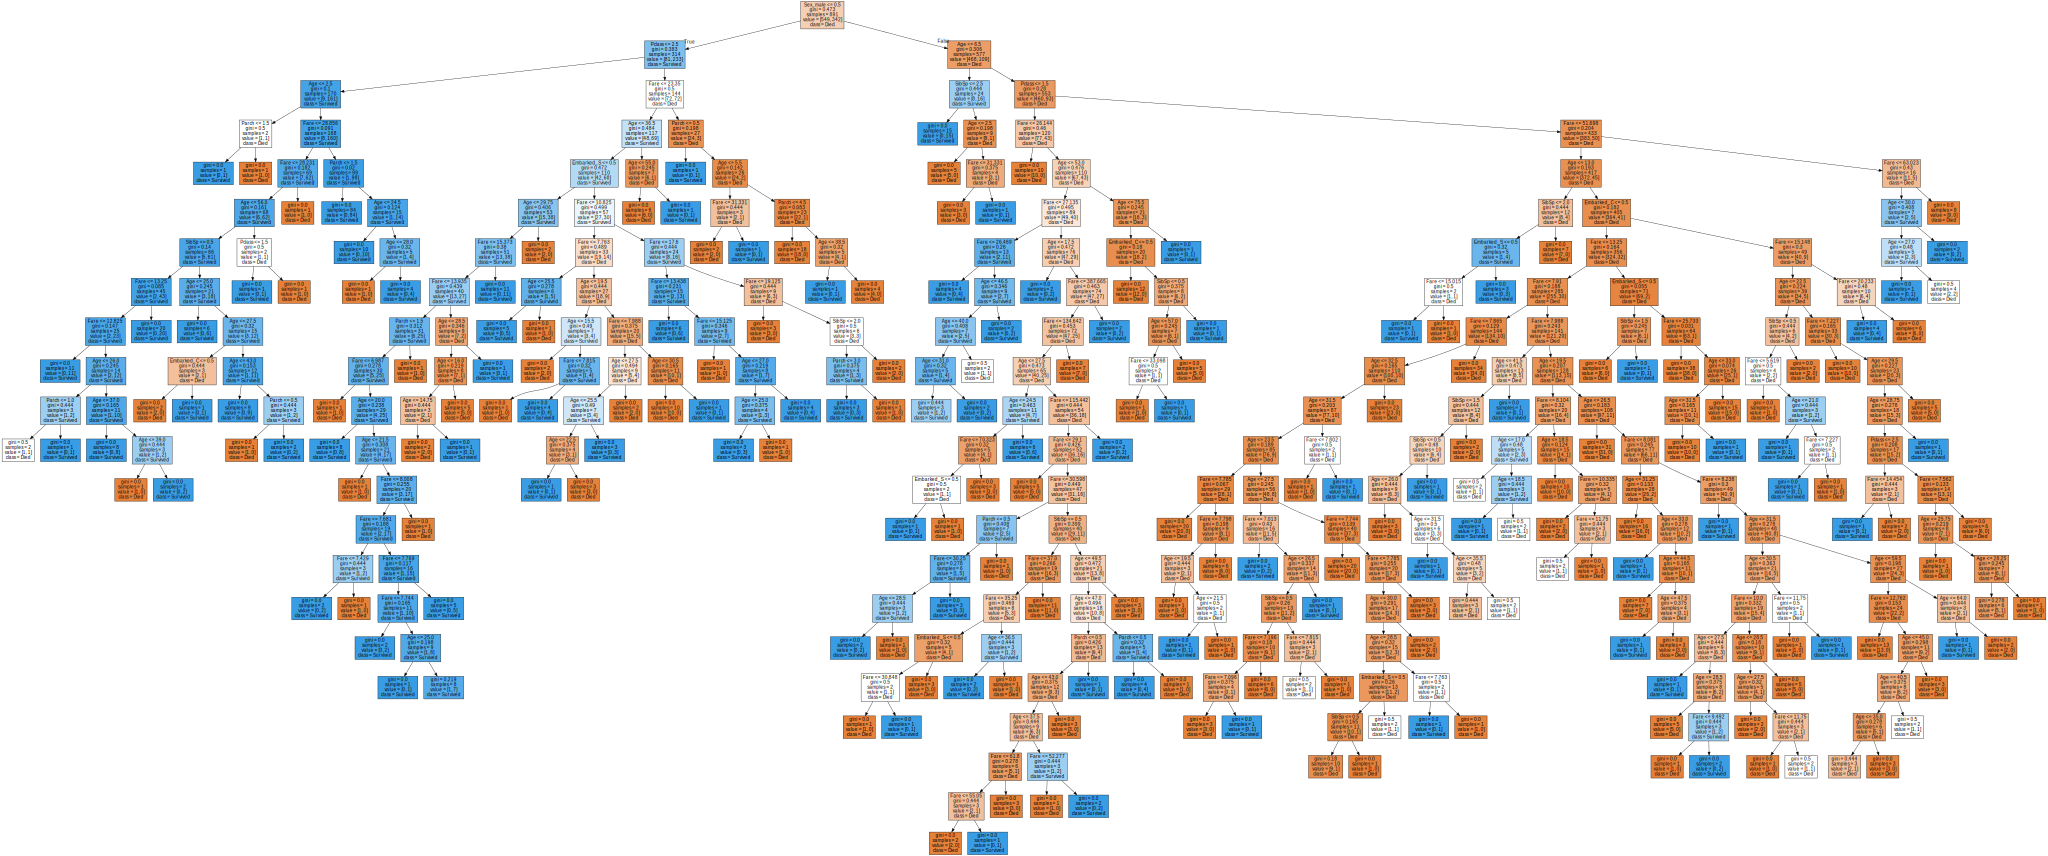

In [11]:
graph = Source(tree.export_graphviz(clf, out_file=None,
    feature_names=list(X),
    class_names=['Died', 'Survived'],
    filled=True))

display(SVG(graph.pipe(format='svg')))

```
Разделим наш датасет на тренировочный и тестовый в отношении 2 к 1
```

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

```
Посмотрим точность классификации нашего дерева на датасете ДО деления
```

In [13]:
clf.score(X,y)

0.9797979797979798

```
Обучим дерево на тренировочной чати нашего датасета
```

In [14]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

```
Точность классификации тренировочных данных высока...
```

In [15]:
clf.score(X_train,y_train)

0.9798657718120806

```
..., но точность классификации тестовых данных (которые модель никогда не видела) - неудовлетворительно низкая
```

In [16]:
clf.score(X_test, y_test)

0.7491525423728813

```
Переопределим решающее дерево, теперь в качестве критерия выберем Энтропию, а также ограничим его макс. глубину до 4
```

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

```
Теперь обучим его только на тренировочной части нашего датасета
```

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

```
Точность классификации данных, на которых дерево обучалось, упала...
```

In [19]:
clf.score(X_train,y_train)

0.8338926174496645

```
..., но тестовые данные, которые оно никогда не 'видело' раньше, теперь дерево классифицирует намного лучше
```

In [20]:
clf.score(X_test, y_test)

0.823728813559322

```
Отрисовка дерева с ограниченной глубиной и Энтропией в качестве критерия
```

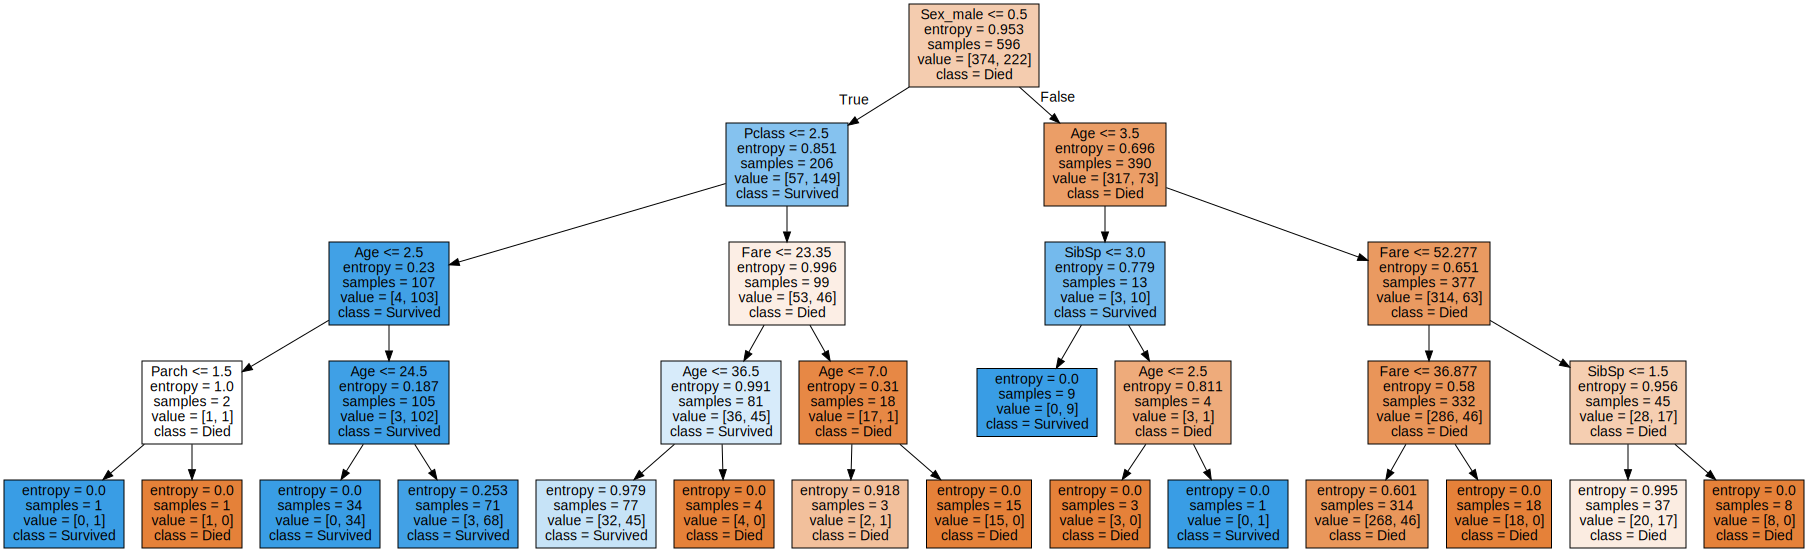

In [21]:
graph = Source(tree.export_graphviz(clf, out_file=None,
    feature_names=list(X),
    class_names=['Died', 'Survived'],
    filled=True))
display(SVG(graph.pipe(format='svg')))

```
Теперь определим оптимальную глубину дерева для наших данных
```

In [22]:
max_depth_values = range(1, 100)

In [23]:
scores_data = pd.DataFrame()

```
В цикле для каждой глубины строится дерево, обучается на тренировочных данных, затем записываются оценки этого дерева на тренировочных и тестовых данных, также высчитывается среднее кросс-валидации.
Из этого всего формируется датафрейм scores_data
```

In [24]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

C:\Users\Pc\AppData\Local\Temp\ipykernel_36900\2532605383.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Pc\AppData\Local\Temp\ipykernel_36900\2532605383.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Pc\AppData\Local\Temp\ipykernel_36900\2532605383.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)
C:\Users\Pc\AppData\Local\Temp\ipykernel_36900\2532605383.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores_data = scores_data.append(temp_score_data)


In [25]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073
...,...,...,...,...
0,95,0.979866,0.769492,0.773543
0,96,0.979866,0.776271,0.768501
0,97,0.979866,0.776271,0.770196
0,98,0.979866,0.766102,0.771877


```
Функция melt() позволяет изменить датафрейм, в данном случае для каждой глубины будет не 1, а 3 строки, в колонке set_type будет стоять вид проверяемых данных, а в score - сама оценка
```

In [26]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                           value_vars=['train_score', 'test_score', 'cross_val_score'],
                           var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.773543
293,96,cross_val_score,0.768501
294,97,cross_val_score,0.770196
295,98,cross_val_score,0.771877


```
Построим график зависимости оценки от глубины дерева, разделив при этом его по виду проверяемых данных
```

<AxesSubplot:xlabel='max_depth', ylabel='score'>

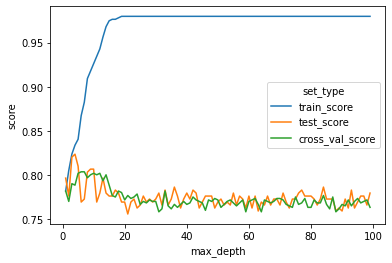

In [27]:
sns.lineplot(x='max_depth',y='score',hue='set_type', data=scores_data_long)

```
Как видно из графика, оптимальной будет глубина, равная 8 или 10 (первый пик графика test_score в расчет мы не берем, так как это вполне вероятно может быть исключением, удачным выбором test подгруппы).

Наиболее объективна оценка cross-val_score
```

```
Таким образом, дерево с оптимальной глубиной даст такой результат:
```

In [28]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [29]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [30]:
best_clf.score(X_test, y_test)

0.8

### Parameters choice (GridSearchCV)

```
Есть множество способов определить оптимальные параметры дерева для конкретного датасета, рассмотрим GridSearchCV()
```

In [31]:
clf = tree.DecisionTreeClassifier()

```
Определим набор параметров, всевозможные комбинации которых будут тестироваться
```

In [32]:
parametrs = {'criterion':['gini','entropy'], 'max_depth':range(1,30)}

```
В функцию GridSearchCV() передаем решающее дерево, тестируемые параметры и количество частей, на которые будет разбиваться тренировочный датасет при кросс-валидации
```

In [33]:
grid_search_cv_clf = GridSearchCV(clf,parametrs,cv = 5)

In [34]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

```
Вывод набора параметров, показавших наибольшее значение accuracy (отношение верно предсказанных исходов ко всем) на кросс-валидационнм множестве
```

In [35]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

```
.best_estimator_ сразу возвращает решающее дерево с оптимальными параметрами
```

In [36]:
trye = grid_search_cv_clf.best_estimator_

```
Проверка оптимального дерева на тестовых параметрах
```

In [37]:
trye.score(X_test, y_test)

0.7694915254237288

### Metrics

```
.predict() выводит решение дерева (категоризацию) для введенного датасета 
(по сути то, для чего это дерево и создавалось)
```

In [38]:
y_pred = trye.predict(X_test)

```
precision_score - одна из главных метрик оценки качества модели

'Точность' -  когда важно, чтобы не было ложных срабатываний, при этом можно пропустить несколько нужных срабатываний
```

In [39]:
precision_score(y_test, y_pred)

0.8023255813953488

```
recall_score - одна из главных метрик оценки качества модели

'Полнота' -  когда важно, чтобы все нужные срабатывания произошли, при этом можно допустить несколько ложных срабатываний
```

In [40]:
recall_score(y_test, y_pred)

0.575

### predicted probability

```
.predict_proba() - возвращает вероятность/уверенность модели в своем результате категоризации данных
```

In [41]:
y_predicted_proba = trye.predict_proba(X_test)
y_predicted_proba

array([[0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [0.65625   , 0.34375   ],
       [1.        , 0.        ],
       [0.23809524, 0.76190476],
       [0.88518519, 0.11481481],
       [0.23809524, 0.76190476],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [1.        , 0.        ],
       [0.88518519, 0.11481481],
       [0.60714286, 0.39285714],
       [0.65625   , 0.34375   ],
       [0.88518519, 0.11481481],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.60714286, 0.39285714],
       [0.88518519, 0.11481481],
       [0.6       , 0.4       ],
       [0.65625   , 0.34375   ],
       [0.

```
Распределение уверенности модели в том, что человек выжил по количеству наблюдений
```

<AxesSubplot:>

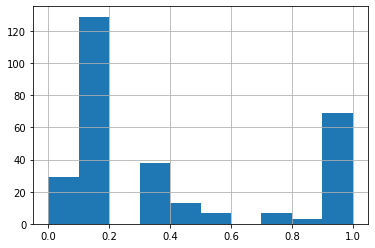

In [42]:
pd.Series(y_predicted_proba[:, 1]).hist() #только второй столбец

```
Меняем пороговое значение уверенности модели, при котором '0' меняется на '1'...
```

In [43]:
y_pred = np.where(y_predicted_proba[:, 1] > 0.9, 1, 0)

```
... и от этого меняются метрики модели, с ростом одной чаще всего падает другая
```

In [44]:
precision_score(y_test, y_pred)

0.8840579710144928

In [45]:
recall_score(y_test, y_pred)

0.5083333333333333

### ROC curve

```
Шаблон визуализации ROC-кривой, показывающей зависимость количества успешных определений выживших от количества определений погибших как выживших

Начиная с правого верхнего угла, где пороговое значение уверенности модели (ПЗУМ) минимально (даже при уверенности в 10% мы считаем человека выжившим), спускаемся в левый нижний угол, где ПЗУМ максимально (90% уверенность модели - не повод считать человека живым)

График идеальной модели должен повторять прямой угол параллелограмма, а наихудшей - пунктирную линию

Значение area, auc - интегральная площадь под графиком
```

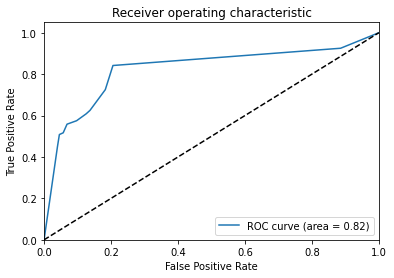

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_proba[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

```
Еще один вариант визуализации того же графика
```

C:\Users\Pc\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


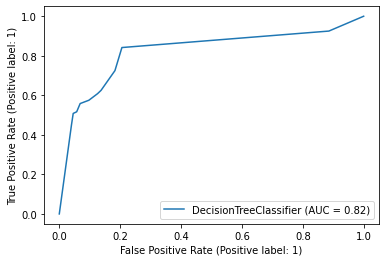

In [47]:
metrics.plot_roc_curve(trye, X_test, y_test)

```
График всевозможных соотношений Precision и Recall для нашей модели

Позволяет достичь оптимального для конкретных целей соотношения метрик, подобрав для этого параметры дерева
```

C:\Users\Pc\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


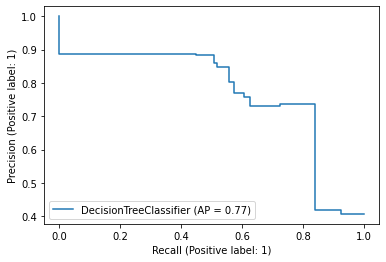

In [48]:
metrics.plot_precision_recall_curve(trye, X_test, y_test)

```
Матрица эффективности модели, показывает соответствие реальных значений предсказанным

По этим соотношениям и вычисляются метрики
```

C:\Users\Pc\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


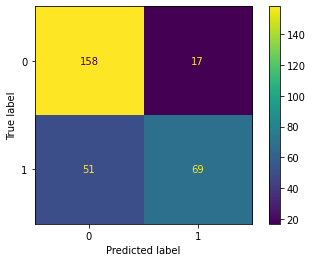

In [49]:
metrics.plot_confusion_matrix(trye, X_test, y_test)